### Import Libraries

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

### Load the data File

In [4]:
df = pd.read_csv("data/modifiedDigits4Classes.csv")

In [5]:
df.shape

(720, 65)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0


### Visualize each Digit

In [13]:
pixel_colnames = df.columns[:-1]

In [14]:
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [28]:
#Get all columns except the label column for the first image
image_values = df.loc[0, pixel_colnames].values

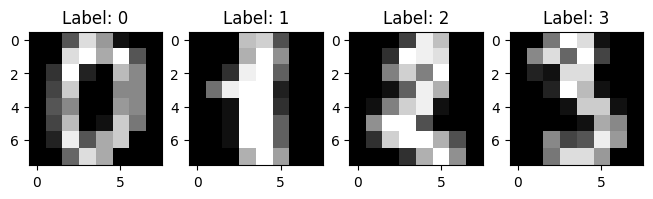

In [31]:
plt.figure(figsize=(10,2))
for index in range(0, 4):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))

### Spliting Data into Train and Test Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)

### Standardize the Data

In [19]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [20]:
#MultiClass is specyfied One vs Rest (OvR)
clf = LogisticRegression(solver = "liblinear",
                        multi_class="ovr",
                        random_state=0)

clf.fit(X_train, y_train)

print("Training Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [22]:
clf.intercept_

array([-2.712674  , -3.54379096, -3.18367757, -2.623974  ])

In [23]:
clf.coef_.shape

(4, 64)

### Predictions

In [24]:
clf.predict_proba(X_test[0:1])

array([[0.00183123, 0.98368966, 0.00536378, 0.00911533]])

In [36]:
clf.predict(X_test[0:1])

array([1], dtype=int64)